In [1]:
import yfinance as yf
import pandas as pd

In [2]:
data = yf.Ticker("2121.T")

In [3]:
income_statement = data.financials
balance_sheet = data.balance_sheet
cash_flow = data.cashflow

In [4]:
print("Income Statement Columns:")
print(income_statement.columns)

print("\nBalance Sheet Columns:")
print(balance_sheet.columns)

print("\nCash Flow Columns:")
print(cash_flow.columns)

Income Statement Columns:
DatetimeIndex(['2024-03-31', '2023-03-31', '2022-03-31', '2021-03-31'], dtype='datetime64[ns]', freq=None)

Balance Sheet Columns:
DatetimeIndex(['2024-03-31', '2023-03-31', '2022-03-31', '2021-03-31',
               '2020-03-31'],
              dtype='datetime64[ns]', freq=None)

Cash Flow Columns:
DatetimeIndex(['2024-03-31', '2023-03-31', '2022-03-31', '2021-03-31',
               '2020-03-31'],
              dtype='datetime64[ns]', freq=None)


In [5]:
income_statement = income_statement.transpose()
balance_sheet = balance_sheet.transpose()
cash_flow = cash_flow.transpose()

In [6]:
income_statement.to_csv("income_statement_2021_2024.csv")
balance_sheet.to_csv("balance_sheet_2021_2024.csv")
cash_flow.to_csv("cash_flow_2021_2024.csv")

print("\nFiltered financial data saved to CSV files.")


Filtered financial data saved to CSV files.


In [7]:
print(balance_sheet.columns)
print(income_statement.columns)
print(cash_flow.columns)

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Common Stock Equity',
       'Total Capitalization', 'Total Equity Gross Minority Interest',
       'Minority Interest', 'Stockholders Equity', 'Other Equity Interest',
       'Treasury Stock', 'Retained Earnings', 'Additional Paid In Capital',
       'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Debt And Capital Lease Obligation', 'Current Debt',
       'Pensionand Other Post Retirement Benefit Plans Current', 'Payables',
       'Other Payable', 'Total Tax Payable', 'Tot

In [8]:
balance_sheet['Current Ratio'] = (
    balance_sheet['Current Assets'] / balance_sheet['Current Liabilities']
)
balance_sheet['Quick Ratio'] = (
    (balance_sheet['Current Assets'] - balance_sheet['Inventory']) / balance_sheet['Current Liabilities']
)
balance_sheet['Working Capital'] = (
    balance_sheet['Current Assets'] - balance_sheet['Current Liabilities']
)

In [9]:
liquidity_and_working_capital = balance_sheet[['Current Ratio', 'Quick Ratio', 'Working Capital']]
print(liquidity_and_working_capital)

           Current Ratio Quick Ratio Working Capital
2024-03-31      6.708246    6.683629  131244000000.0
2023-03-31      5.570613    5.554062  133663000000.0
2022-03-31      7.476903     7.44179  135024000000.0
2021-03-31      6.781003    6.774635  141623000000.0
2020-03-31           NaN         NaN             NaN


In [10]:
# Debt-to-Equity Ratio: Total Debt / Stockholders Equity
balance_sheet['Debt-to-Equity Ratio'] = balance_sheet['Total Debt'] / balance_sheet['Stockholders Equity']

# Debt-to-Assets Ratio: Total Debt / Total Assets
balance_sheet['Debt-to-Assets Ratio'] = balance_sheet['Total Debt'] / balance_sheet['Total Assets']

# Long-term Debt-to-Total Capitalization: Long Term Debt / Total Capitalization
balance_sheet['Long-term Debt-to-Total Capitalization'] = balance_sheet['Long Term Debt'] / balance_sheet['Total Capitalization']

# Interest Coverage Ratio (EBIT/Interest Expense): EBIT / Interest Expense
balance_sheet['Interest Coverage Ratio'] = income_statement['EBIT'] / income_statement['Interest Expense']

In [11]:
leverage_and_debt = balance_sheet[['Debt-to-Equity Ratio','Debt-to-Assets Ratio','Long-term Debt-to-Total Capitalization','Interest Coverage Ratio']]
print(leverage_and_debt)

           Debt-to-Equity Ratio Debt-to-Assets Ratio  \
2024-03-31              0.04258             0.035839   
2023-03-31             0.042743             0.035017   
2022-03-31             0.043989             0.037247   
2021-03-31             0.047095             0.039433   
2020-03-31                  NaN                  NaN   

           Long-term Debt-to-Total Capitalization Interest Coverage Ratio  
2024-03-31                                0.03506              222.578947  
2023-03-31                               0.036364              191.745763  
2022-03-31                               0.038919              263.868852  
2021-03-31                               0.040038              893.346154  
2020-03-31                                    NaN                     NaN  


In [12]:
# Asset Turnover Ratio: Total Revenue / Total Assets
income_statement['Asset Turnover Ratio'] = income_statement['Total Revenue'] / balance_sheet['Total Assets']

# Fixed Asset Turnover Ratio: Total Revenue / Net PPE
income_statement['Fixed Asset Turnover Ratio'] = income_statement['Total Revenue'] / balance_sheet['Net PPE']

In [13]:
asset_efficiency = income_statement[['Asset Turnover Ratio','Fixed Asset Turnover Ratio']]
print(asset_efficiency)

           Asset Turnover Ratio Fixed Asset Turnover Ratio
2024-03-31             0.708337                   8.377139
2023-03-31             0.660608                   9.717282
2022-03-31             0.559627                    8.12883
2021-03-31              0.52713                   9.179797


In [14]:
# Return on Equity (ROE): Net Income / Common Stock Equity
balance_sheet['Return on Equity (ROE)'] = income_statement['Net Income'] / balance_sheet['Common Stock Equity']

# Book Value per Share: (Stockholders Equity - Treasury Stock) / Ordinary Shares Number
balance_sheet['Book Value per Share'] = (balance_sheet['Stockholders Equity'] - balance_sheet['Treasury Stock']) / balance_sheet['Ordinary Shares Number']

In [15]:
equity_performance = balance_sheet[['Return on Equity (ROE)','Book Value per Share']]
print(equity_performance)

           Return on Equity (ROE) Book Value per Share
2024-03-31                0.04058          2335.499431
2023-03-31               0.028336          2264.329867
2022-03-31               0.055579          2293.354357
2021-03-31               0.082794          2371.095245
2020-03-31                    NaN                  NaN


In [16]:
# Net PPE as % of Total Assets: (Net PPE / Total Assets) * 100
balance_sheet['Net PPE as % of Total Assets'] = (balance_sheet['Net PPE'] / balance_sheet['Total Assets']) * 100

# Accumulated Depreciation %: (Accumulated Depreciation / Gross PPE) * 100
balance_sheet['Accumulated Depreciation %'] = (balance_sheet['Accumulated Depreciation'] / balance_sheet['Gross PPE']) * 100

In [17]:
other_notable_metrics = balance_sheet[['Net PPE as % of Total Assets','Accumulated Depreciation %']]
print(other_notable_metrics)

           Net PPE as % of Total Assets Accumulated Depreciation %
2024-03-31                     8.455595                 -26.425784
2023-03-31                     6.798278                 -26.346313
2022-03-31                      6.88447                 -22.278022
2021-03-31                     5.742282                  -19.87053
2020-03-31                          NaN                        NaN


In [18]:
# Operating Cash Flow (OCF) Margin: OCF / Total Revenue
cash_flow['OCF Margin'] = cash_flow['Operating Cash Flow'] / income_statement['Total Revenue']

# Free Cash Flow (FCF): Operating Cash Flow - Capital Expenditure
cash_flow['FCF'] = cash_flow['Operating Cash Flow'] - cash_flow['Capital Expenditure']

# FCF Margin: FCF / Total Revenue
cash_flow['FCF Margin'] = cash_flow['FCF'] / income_statement['Total Revenue']


In [19]:
cash_flow_ratios = cash_flow[['OCF Margin','FCF','FCF Margin']]
print(cash_flow_ratios)

           OCF Margin            FCF FCF Margin
2024-03-31   0.062512  12642000000.0   0.086077
2023-03-31   0.107247  18300000000.0   0.124603
2022-03-31   0.021691   6541000000.0   0.053602
2021-03-31   0.290582  39470000000.0   0.330794
2020-03-31        NaN            NaN        NaN


In [20]:
# Net Debt Repayment: Repayment of Debt - Issuance of Debt
cash_flow['Net Debt Repayment'] = cash_flow['Repayment Of Debt'] - cash_flow['Issuance Of Debt']

# Cash Interest Coverage: Operating Cash Flow / Interest Paid Cfo
cash_flow['Cash Interest Coverage'] = cash_flow['Operating Cash Flow'] / cash_flow['Interest Paid Cfo']

In [21]:
debt_management = cash_flow[['Net Debt Repayment','Cash Interest Coverage']]
print(debt_management)

           Net Debt Repayment Cash Interest Coverage
2024-03-31                NaN            -173.226415
2023-03-31       -540000000.0            -266.966102
2022-03-31       -452000000.0             -44.864407
2021-03-31      -7127000000.0           -1238.285714
2020-03-31                NaN                    NaN


In [22]:
# Capital Expenditure Ratio: Capital Expenditure / Operating Cash Flow
cash_flow['Capital Expenditure Ratio'] = cash_flow['Capital Expenditure'] / cash_flow['Operating Cash Flow']

# Net Investment Activities: Net Investment Purchase and Sale - Purchase of PPE
cash_flow['Net Investment Activities'] = cash_flow['Net Investment Purchase And Sale'] - cash_flow['Purchase Of PPE']

In [23]:
investment_and_capital_expenditure = cash_flow[['Capital Expenditure Ratio','Net Investment Activities']]
print(investment_and_capital_expenditure)

           Capital Expenditure Ratio Net Investment Activities
2024-03-31                 -0.376974               259000000.0
2023-03-31                 -0.161831             -1477000000.0
2022-03-31                 -1.471099            -10484000000.0
2021-03-31                 -0.138383              1463000000.0
2020-03-31                       NaN                       NaN


In [24]:
# Cash Conversion Efficiency (CCE): Operating Cash Flow / Net Income
cash_flow['Cash Conversion Efficiency (CCE)'] = (cash_flow['Operating Cash Flow'] /
                                                       income_statement['Net Income From Continuing And Discontinued Operation'])

In [25]:
cash_efficiency = cash_flow[['Cash Conversion Efficiency (CCE)']]
print(cash_efficiency)

           Cash Conversion Efficiency (CCE)
2024-03-31                         1.296385
2023-03-31                         3.051928
2022-03-31                         0.257942
2021-03-31                         2.209534
2020-03-31                              NaN


In [26]:
# Gross Profit Margin: Gross Profit / Total Revenue
income_statement['Gross Profit Margin'] = income_statement['Gross Profit'] / income_statement['Total Revenue']

# Operating Margin: Operating Income / Total Revenue
income_statement['Operating Margin'] = income_statement['Operating Income'] / income_statement['Total Revenue']

# Net Profit Margin: Net Income / Total Revenue
income_statement['Net Profit Margin'] = income_statement['Net Income From Continuing And Discontinued Operation'] / income_statement['Total Revenue']

# EBITDA Margin: EBITDA / Total Revenue
income_statement['EBITDA Margin'] = income_statement['EBITDA'] / income_statement['Total Revenue']

# Return on Sales (ROS): Operating Income / Total Expenses
income_statement['Return on Sales (ROS)'] = income_statement['Operating Income'] / income_statement['Total Expenses']


In [27]:
profitability = income_statement[['Gross Profit Margin','Operating Margin','Net Profit Margin','EBITDA Margin','Return on Sales (ROS)']]
print(profitability)

           Gross Profit Margin Operating Margin Net Profit Margin  \
2024-03-31            0.698784         0.130573           0.04822   
2023-03-31            0.715756         0.168996          0.035141   
2022-03-31            0.740138          0.14594          0.084094   
2021-03-31            0.782021         0.192166          0.131513   

           EBITDA Margin Return on Sales (ROS)  
2024-03-31      0.115784              0.150184  
2023-03-31      0.108765              0.203364  
2022-03-31      0.166844              0.170879  
2021-03-31      0.229754              0.237877  


In [28]:
# Cost of Revenue %: Cost of Revenue / Total Revenue
income_statement['Cost of Revenue %'] = income_statement['Cost Of Revenue'] / income_statement['Total Revenue']

# R&D and SG&A %: Operating Expense / Total Revenue
income_statement['R&D and SG&A %'] = income_statement['Operating Expense'] / income_statement['Total Revenue']

In [29]:
expense_management = income_statement[['Cost of Revenue %','R&D and SG&A %']]
print(expense_management)

           Cost of Revenue % R&D and SG&A %
2024-03-31          0.301209       0.568211
2023-03-31          0.284244        0.54676
2022-03-31          0.259854       0.594198
2021-03-31          0.217979       0.589856


In [30]:
income_statement_filtered = income_statement.sort_index(ascending=True)

# Revenue Growth Rate: (Current Revenue - Previous Revenue) / Previous Revenue
income_statement['Revenue Growth Rate'] = income_statement_filtered['Total Revenue'].pct_change()

# Net Income Growth Rate: (Current Net Income - Previous Net Income) / Previous Net Income
income_statement['Net Income Growth Rate'] = income_statement_filtered['Net Income'].pct_change()


C:\Users\jiaju\AppData\Local\Temp\ipykernel_134564\2651915847.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  income_statement['Revenue Growth Rate'] = income_statement_filtered['Total Revenue'].pct_change()
C:\Users\jiaju\AppData\Local\Temp\ipykernel_134564\2651915847.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  income_statement['Net Income Growth Rate'] = income_statement_filtered['Net Income'].pct_change()


In [31]:
growth_metrics = income_statement[['Revenue Growth Rate','Net Income Growth Rate']]
print(growth_metrics)

            Revenue Growth Rate  Net Income Growth Rate
2024-03-31             0.000007                0.372215
2023-03-31             0.203532               -0.497077
2022-03-31             0.022721               -0.346036
2021-03-31                  NaN                     NaN


In [32]:
# Earnings Per Share (EPS): Net Income / Basic Average Shares
income_statement['Earnings Per Share (EPS)'] = income_statement['Net Income'] / income_statement['Basic Average Shares']

# Diluted EPS: Net Income / Diluted Average Shares
income_statement['Diluted EPS'] = income_statement['Net Income'] / income_statement['Diluted Average Shares']

In [33]:
per_share_performance = income_statement[['Earnings Per Share (EPS)','Diluted EPS']]
print(per_share_performance)

           Earnings Per Share (EPS) Diluted EPS
2024-03-31                    99.71       98.56
2023-03-31                  70.8563       70.08
2022-03-31               139.840483      137.78
2021-03-31               208.225684  205.719999


In [34]:
# Effective Tax Rate: Tax Provision / Pretax Income
income_statement['Effective Tax Rate'] = income_statement['Tax Provision'] / income_statement['Pretax Income']

In [35]:
tax_efficiency = income_statement[['Effective Tax Rate']]
print(tax_efficiency)

           Effective Tax Rate
2024-03-31           0.450435
2023-03-31           0.475209
2022-03-31           0.364952
2021-03-31            0.32365


In [36]:
# Normalized Income Margin: Normalized Income / Total Revenue
income_statement['Normalized Income Margin'] = income_statement['Normalized Income'] / income_statement['Total Revenue']

# Net Income Continuous Operations Margin: Net Income Continuous Operations / Total Revenue
income_statement['Net Income Continuous Operations Margin'] = income_statement['Net Income Continuous Operations'] / income_statement['Total Revenue']

In [37]:
other_insights = income_statement[['Normalized Income Margin','Net Income Continuous Operations Margin']]
print(other_insights)

           Normalized Income Margin Net Income Continuous Operations Margin
2024-03-31                 0.068975                                 0.04726
2023-03-31                 0.071709                                0.040213
2022-03-31                 0.092281                                0.083447
2021-03-31                 0.130972                                0.131513


In [38]:
cash_flow['croa'] = cash_flow['Operating Cash Flow'] / balance_sheet['Total Assets']

In [39]:
cash_return_on_assets = cash_flow[['croa']]
print(cash_return_on_assets)

                croa
2024-03-31  0.044279
2023-03-31  0.070848
2022-03-31  0.012139
2021-03-31  0.153175
2020-03-31       NaN


In [40]:
cash_flow['croe'] = cash_flow['Operating Cash Flow'] / balance_sheet['Common Stock Equity']

In [41]:
cash_return_on_equity = cash_flow[['croe']]
print(cash_return_on_equity)

                croe
2024-03-31  0.052607
2023-03-31   0.08648
2022-03-31  0.014336
2021-03-31  0.182936
2020-03-31       NaN


In [42]:
# Calculate invested capital
balance_sheet['invested_capital'] = balance_sheet['Total Debt'] + balance_sheet['Stockholders Equity']
    
# Calculate ROIC (EBIT - Tax Provision) / Invested Capital
balance_sheet['roic'] = (income_statement['EBIT'] - income_statement['Tax Provision']) / balance_sheet['invested_capital']

In [43]:
return_on_invested_capital = balance_sheet[['roic']]
print(return_on_invested_capital)

                roic
2024-03-31  0.038461
2023-03-31  0.031408
2022-03-31  0.053144
2021-03-31  0.079201
2020-03-31       NaN


In [44]:
# Calculate Total Debt Coverage
cash_flow['total_debt_coverage'] = cash_flow['Operating Cash Flow'] / balance_sheet['Total Debt']

In [45]:
total_debt_coverage = cash_flow['total_debt_coverage']
print(total_debt_coverage)

2024-03-31      1.2355
2023-03-31     2.02325
2022-03-31    0.325905
2021-03-31    3.884383
2020-03-31         NaN
Name: total_debt_coverage, dtype: object


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data = {
    'Date': ['2021-03-31', '2022-03-31', '2023-03-31', '2024-03-31'],
    'Current Ratio': [6.78, 7.48, 5.57, 6.71],
    'Quick Ratio': [6.77, 7.44, 5.55, 6.68],
    'Working Capital': [141623000000, 135024000000, 133663000000, 131244000000],
    'Return On Equity': [0.0828, 0.0556, 0.0283, 0.0406],
    'Net Profit Margin': [0.1315, 0.0841, 0.0351, 0.0482],
    'Operating Margin': [0.1921, 0.1459, 0.1690, 0.1306],
    'Gross Profit Margin': [0.7820, 0.7401, 0.7158, 0.6988],
    'Debt-to-Equity Ratio': [0.0471, 0.0440, 0.0427, 0.0426],
    'Debt-to-Assets Ratio': [0.0394, 0.0372, 0.0350, 0.0358],
    'FCF': [39470000000, 6541000000, 18300000000, 12642000000],
    'Revenue Growth': [0, 0.0227, 0.2035, 0.0000],
    'Net Income Growth': [0, -0.3460, -0.4970, 0.3722],
    'EPS': [208.23, 139.84, 70.85, 99.71],
    'Diluted EPS': [205.72, 137.78, 70.08, 98.56],
    'Long-term Debt-to-Total Capitalization': [0.0400, 0.0389, 0.0364, 0.0351],
    'Interest Coverage Ratio': [893.35, 263.87, 191.75, 222.58],
    'Asset Turnover Ratio': [0.5271, 0.5596, 0.6606, 0.7083],
    'Fixed Asset Turnover Ratio': [9.1798, 8.1288, 9.7173, 8.3771],
    'Book Value per Share': [2371.10, 2293.35, 2264.33, 2335.50],
    'Net PPE as % of Total Assets': [5.7423, 6.8845, 6.7983, 8.4556],
    'Accumulated Depreciation': [-19.87, -22.28, -26.34, -26.43],
    'OCF Margin': [0.2906, 0.0217, 0.1072, 0.0625],
    'FCF Margin': [0.3308, 0.0536, 0.1246, 0.0861],
    'Net Debt Repayment': [-7127000000, -452000000, -540000000, 0],
    'Cash Interest Coverage': [-1238.29, -44.86, -266.97, -173.23],
    'Capital Expenditure Ratio': [-0.1384, -1.4711, -0.1618, -0.3769],
    'Net Investment Activities': [1463000000, -10484000000, -1477000000, 259000000],
    'Cash Conversion Efficiency': [2.2095, 0.2579, 3.0519, 1.2964],
    'EBITDA Margin': [0.2298, 0.1668, 0.1088, 0.1158],
    'Return on Sales': [0.2379, 0.1709, 0.2034, 0.1502],
    'Cost of Revenue %': [0.2179, 0.2599, 0.2842, 0.3012],
    'R&D and SG&A %': [0.5899, 0.5942, 0.5468, 0.5682],
    'Effective Tax Rate': [0.3237, 0.3649, 0.4752, 0.4504],
    'Normalized Income Margin': [0.1309, 0.0923, 0.0717, 0.0689],
    'Net Income Continuous Operations Margin': [0.1315, 0.0834, 0.0402, 0.0473],
    'Cash Return on Assets': [0.1532, 0.0121, 0.0708, 0.0443],
    'Cash Return on Equity': [0.1829, 0.0143, 0.0865, 0.0526],
    'Return on Invested Capital': [0.0792, 0.0531, 0.0314, 0.0385],
    'Total Debt Coverage': [3.8843, 0.3259, 2.0233, 1.2355]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

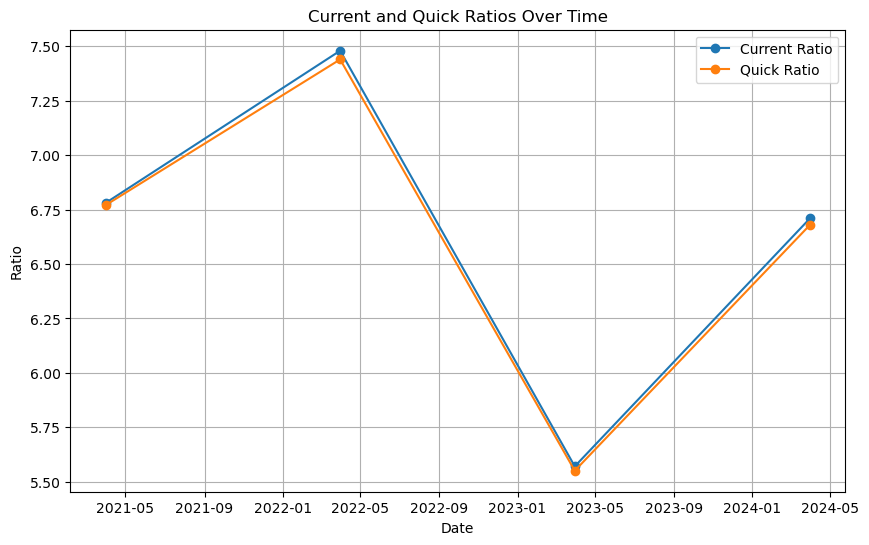

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Current Ratio'], marker='o', label='Current Ratio')
plt.plot(df['Date'], df['Quick Ratio'], marker='o', label='Quick Ratio')
plt.title('Current and Quick Ratios Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

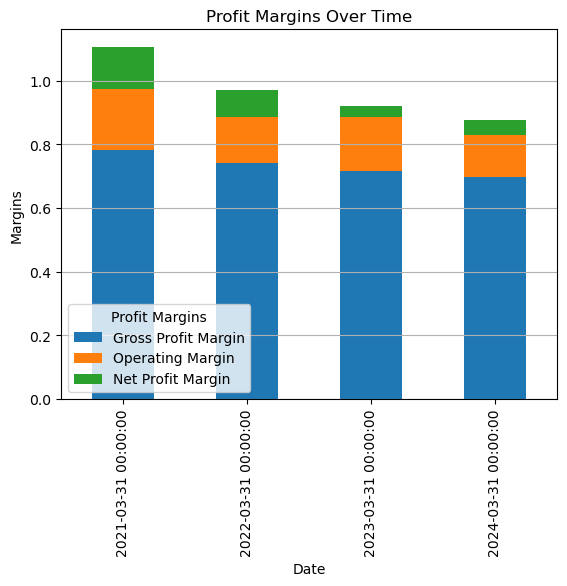

In [100]:
plt.figure(figsize=(10, 6))
df.set_index('Date')[['Gross Profit Margin', 'Operating Margin', 'Net Profit Margin']].plot(kind='bar', stacked=True)
plt.title('Profit Margins Over Time')
plt.ylabel('Margins')
plt.xlabel('Date')
plt.legend(title='Profit Margins')
plt.grid(axis='y')
plt.show()

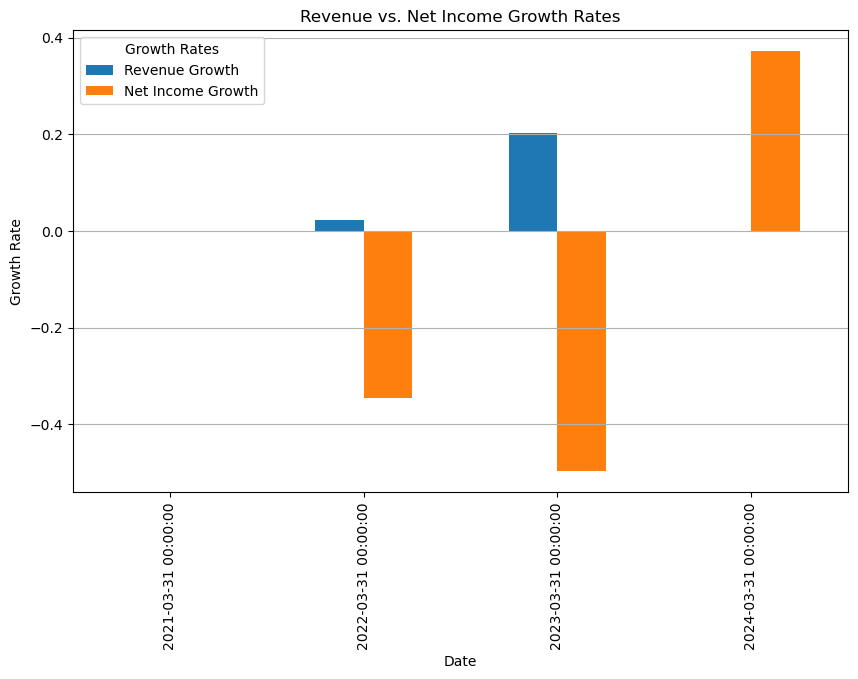

In [102]:
df_growth = df[['Date', 'Revenue Growth', 'Net Income Growth']].set_index('Date')
df_growth.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue vs. Net Income Growth Rates')
plt.ylabel('Growth Rate')
plt.xlabel('Date')
plt.legend(title='Growth Rates')
plt.grid(axis='y')
plt.show()

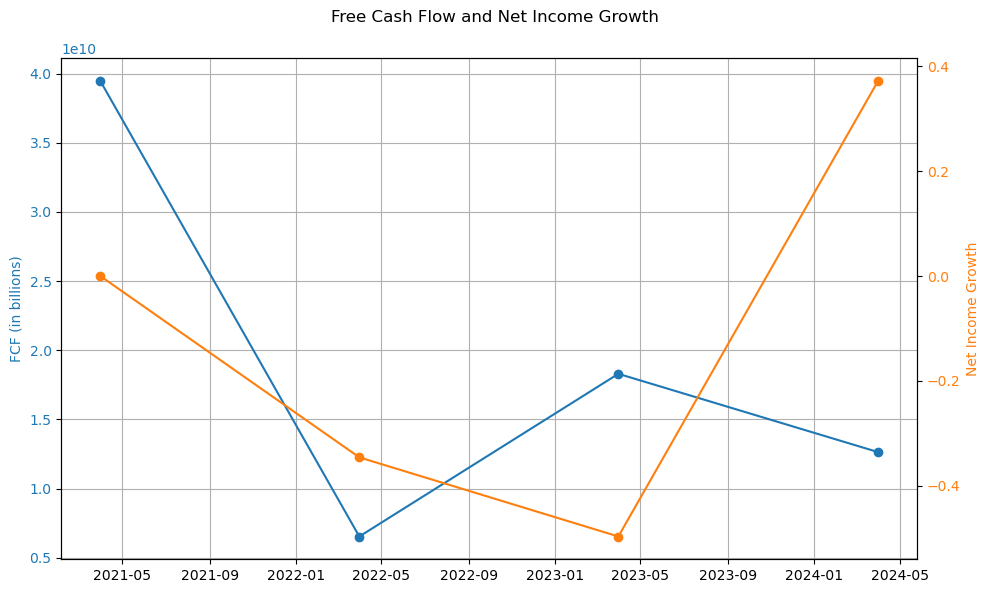

In [108]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis (FCF)
ax1.plot(df['Date'], df['FCF'], color='tab:blue', marker='o', label='FCF')
ax1.set_ylabel('FCF (in billions)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()

# Second axis (Net Income Growth)
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Net Income Growth'], color='tab:orange', marker='o', label='Net Income Growth')
ax2.set_ylabel('Net Income Growth', color='tab:orange')  # Fixed ylabel
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle('Free Cash Flow and Net Income Growth')
fig.tight_layout()
plt.show()

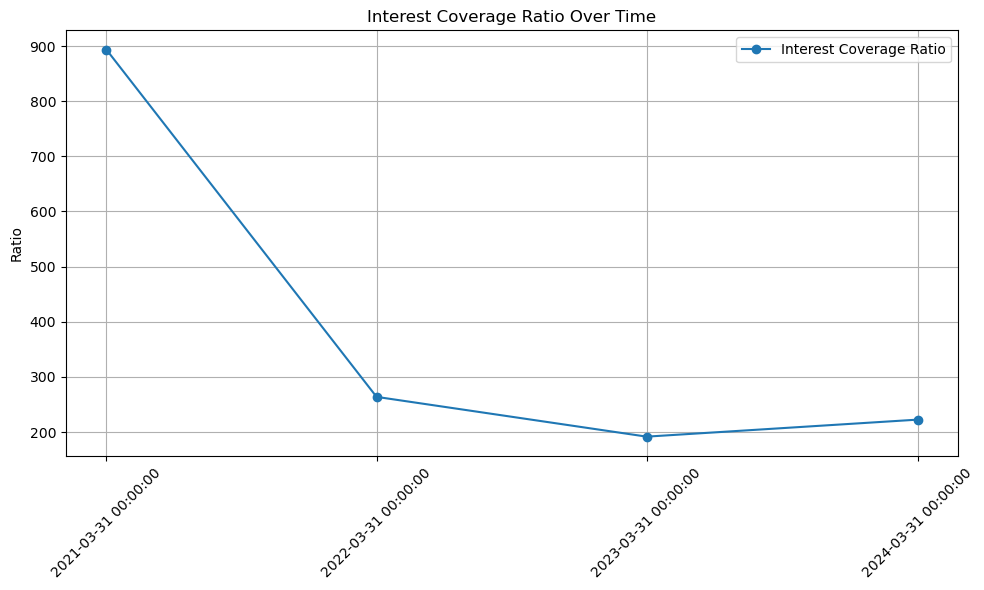

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date'], df['Interest Coverage Ratio'], marker='o', color='tab:blue', label='Interest Coverage Ratio')
ax.set_ylabel('Ratio')
ax.set_title('Interest Coverage Ratio Over Time')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

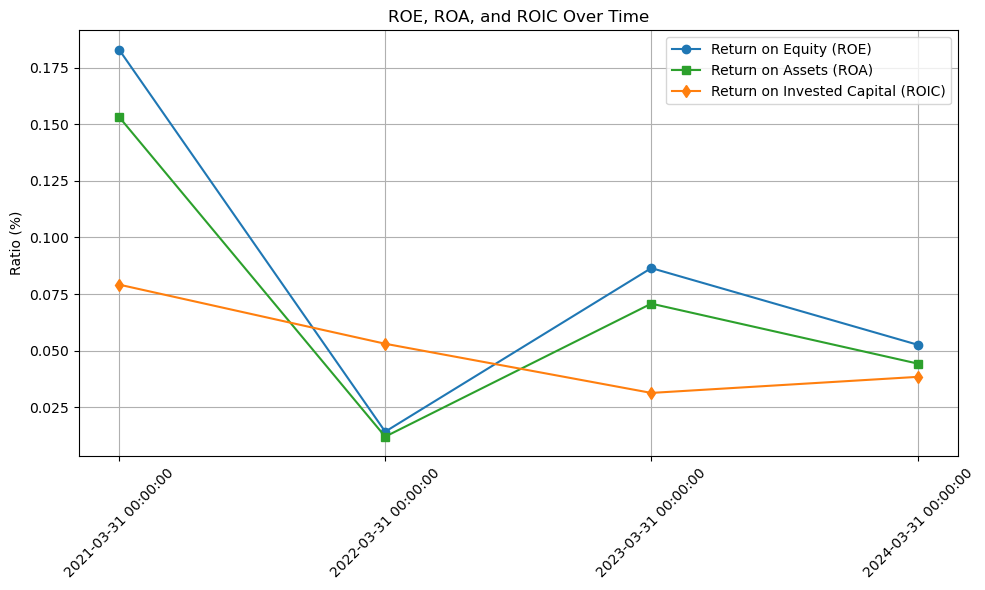

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date'], df['Cash Return on Equity'], marker='o', label='Return on Equity (ROE)', color='tab:blue')
ax.plot(df['Date'], df['Cash Return on Assets'], marker='s', label='Return on Assets (ROA)', color='tab:green')
ax.plot(df['Date'], df['Return on Invested Capital'], marker='d', label='Return on Invested Capital (ROIC)', color='tab:orange')

ax.set_ylabel('Ratio (%)')
ax.set_title('ROE, ROA, and ROIC Over Time')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

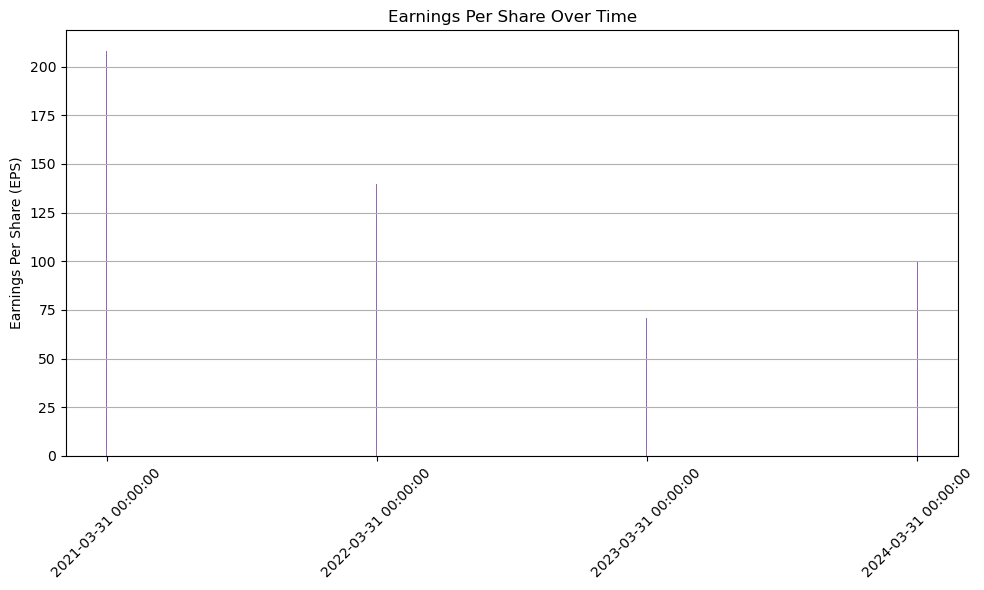

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df['Date'], df['EPS'], color='tab:purple')

ax.set_ylabel('Earnings Per Share (EPS)')
ax.set_title('Earnings Per Share Over Time')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid(axis='y')

plt.tight_layout()
plt.show()

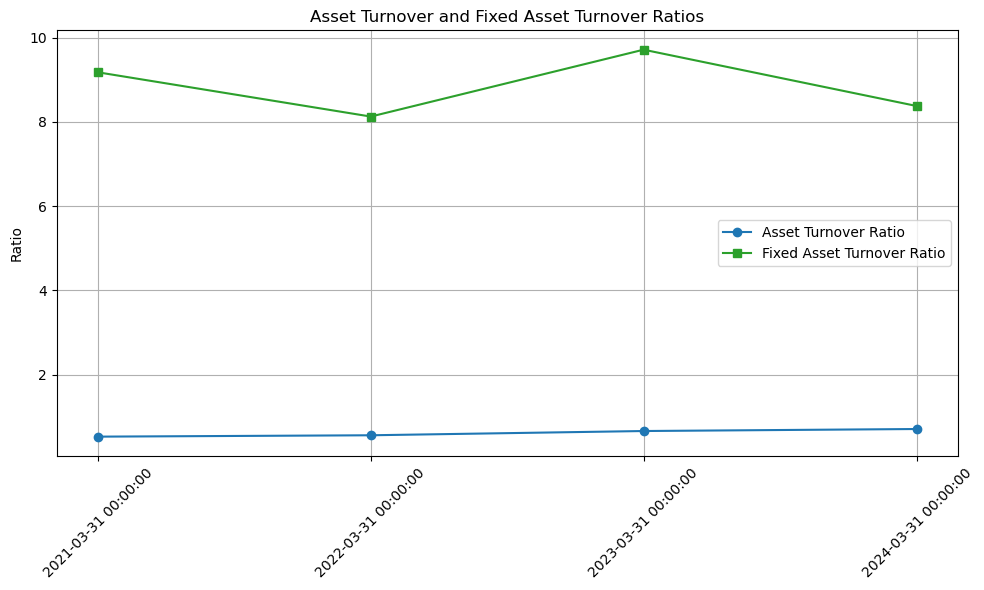

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date'], df['Asset Turnover Ratio'], marker='o', label='Asset Turnover Ratio', color='tab:blue')
ax.plot(df['Date'], df['Fixed Asset Turnover Ratio'], marker='s', label='Fixed Asset Turnover Ratio', color='tab:green')

ax.set_ylabel('Ratio')
ax.set_title('Asset Turnover and Fixed Asset Turnover Ratios')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

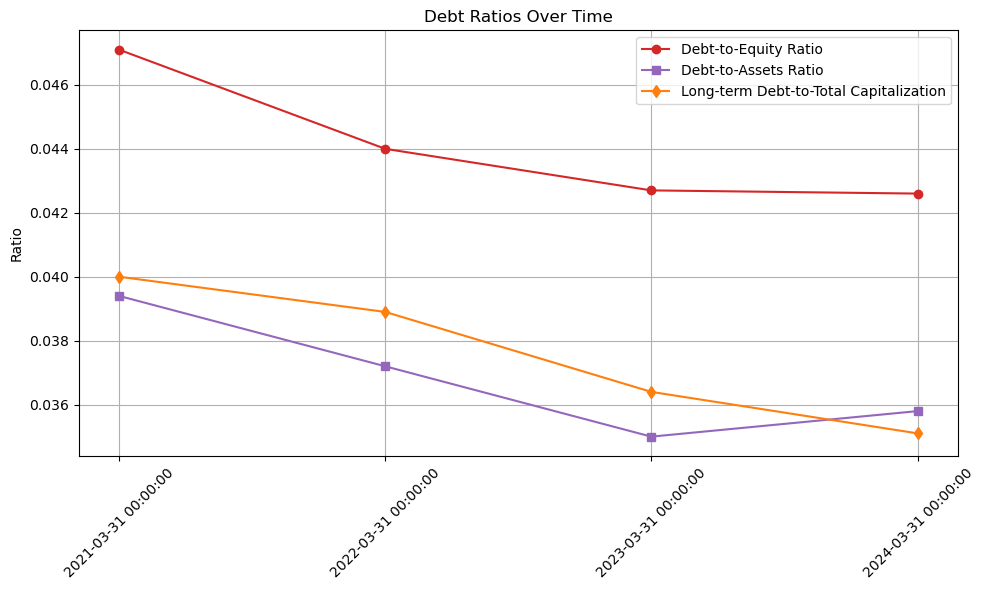

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date'], df['Debt-to-Equity Ratio'], marker='o', label='Debt-to-Equity Ratio', color='tab:red')
ax.plot(df['Date'], df['Debt-to-Assets Ratio'], marker='s', label='Debt-to-Assets Ratio', color='tab:purple')
ax.plot(df['Date'], df['Long-term Debt-to-Total Capitalization'], marker='d', label='Long-term Debt-to-Total Capitalization', color='tab:orange')

ax.set_ylabel('Ratio')
ax.set_title('Debt Ratios Over Time')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

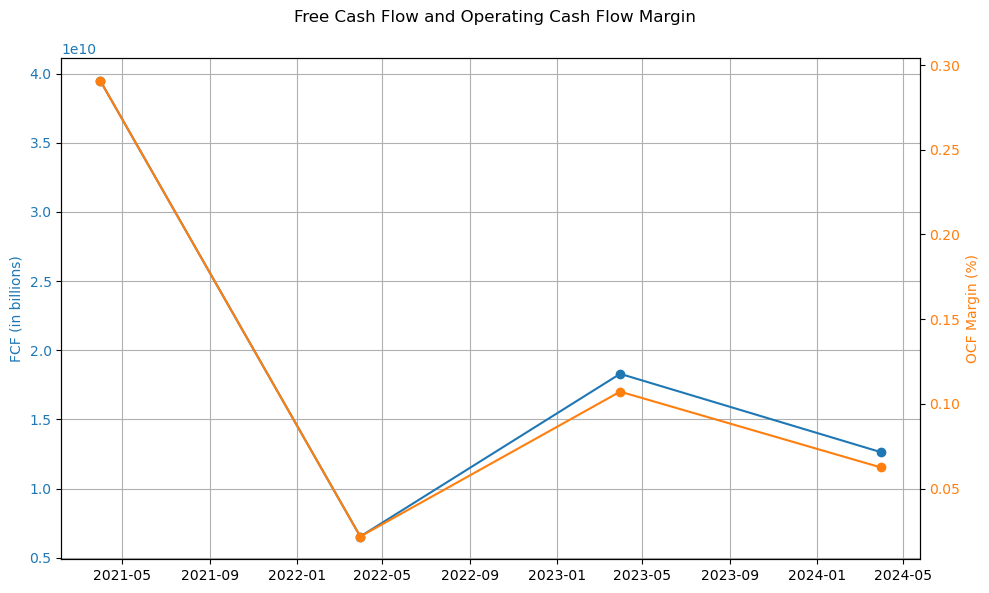

In [128]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['Date'], df['FCF'], color='tab:blue', marker='o', label='Free Cash Flow (FCF)')
ax1.set_ylabel('FCF (in billions)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['OCF Margin'], color='tab:orange', marker='o', label='Operating Cash Flow Margin')
ax2.set_ylabel('OCF Margin (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle('Free Cash Flow and Operating Cash Flow Margin')
fig.tight_layout()
plt.show()

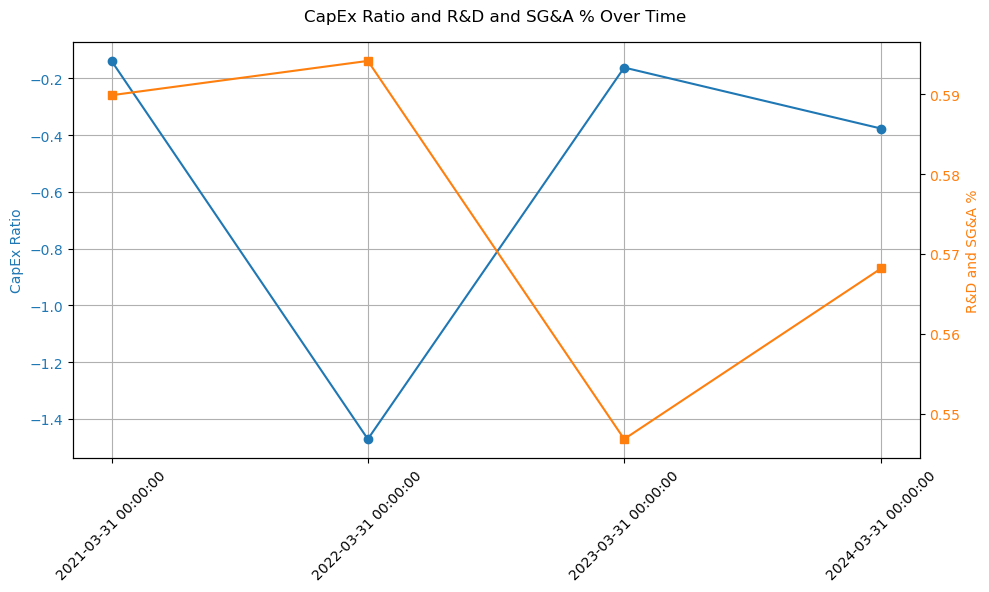

In [138]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis for CapEx Ratio
ax1.plot(df['Date'], df['Capital Expenditure Ratio'], marker='o', color='tab:blue', label='CapEx Ratio')
ax1.set_ylabel('CapEx Ratio', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(df['Date'])
ax1.set_xticklabels(df['Date'], rotation=45)
ax1.grid()

# Second axis for R&D and SG&A %
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['R&D and SG&A %'], marker='s', color='tab:orange', label='R&D and SG&A %')
ax2.set_ylabel('R&D and SG&A %', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and legend
fig.suptitle('CapEx Ratio and R&D and SG&A % Over Time')
fig.tight_layout()
plt.show()

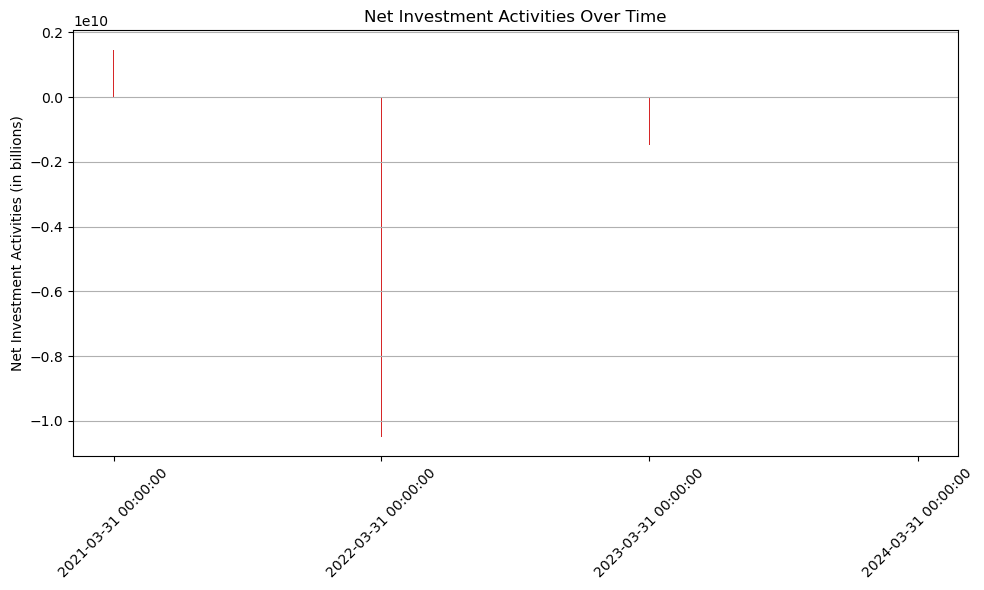

In [140]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df['Date'], df['Net Investment Activities'], color='tab:red')

ax.set_ylabel('Net Investment Activities (in billions)')
ax.set_title('Net Investment Activities Over Time')
ax.set_xticks(df['Date'])
ax.set_xticklabels(df['Date'], rotation=45)
ax.grid(axis='y')

plt.tight_layout()
plt.show()

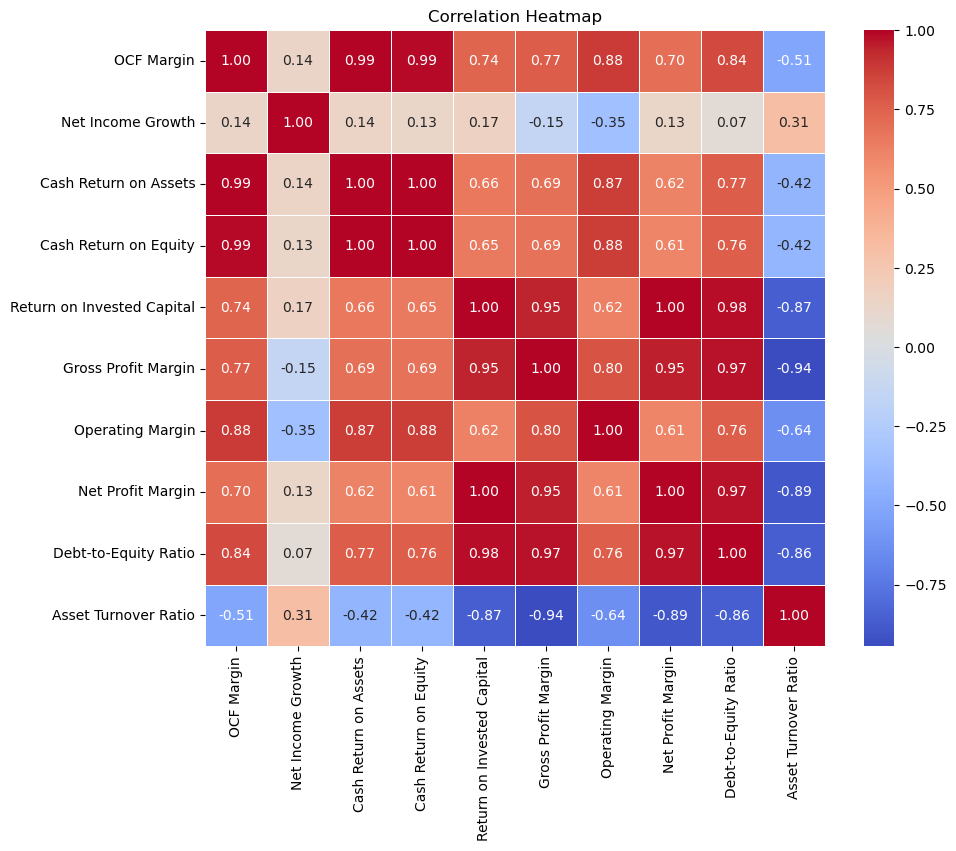

In [146]:
correlation_columns = [
    'OCF Margin', 'Net Income Growth', 'Cash Return on Assets', 'Cash Return on Equity', 'Return on Invested Capital',
    'Gross Profit Margin', 'Operating Margin', 'Net Profit Margin',
    'Debt-to-Equity Ratio', 'Asset Turnover Ratio']

correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


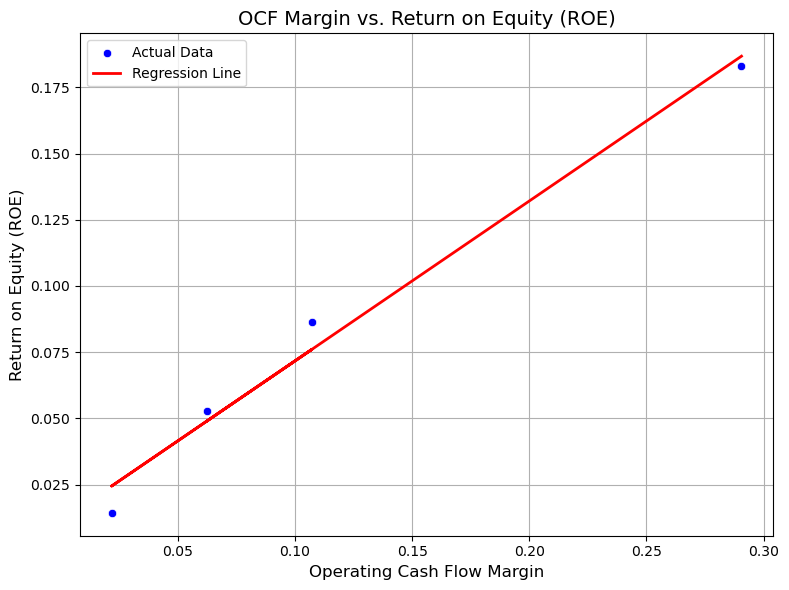

Regression results for OCF Margin and ROE:
                              OLS Regression Results                             
Dep. Variable:     Cash Return on Equity   R-squared:                       0.985
Model:                               OLS   Adj. R-squared:                  0.977
Method:                    Least Squares   F-statistic:                     128.6
Date:                   Fri, 27 Dec 2024   Prob (F-statistic):            0.00769
Time:                           16:22:47   Log-Likelihood:                 13.772
No. Observations:                      4   AIC:                            -23.54
Df Residuals:                          2   BIC:                            -24.77
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [152]:
# Define independent and dependent variables
X = df['OCF Margin']  # Predictor: Operating Cash Flow Margin
y = df['Cash Return on Equity']  # Outcome: Return on Equity

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_roe = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_roe.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['OCF Margin'], y=y, label="Actual Data", color="blue")
plt.plot(X['OCF Margin'], y_pred, label="Regression Line", color="red", linewidth=2)
plt.title("OCF Margin vs. Return on Equity (ROE)", fontsize=14)
plt.xlabel("Operating Cash Flow Margin", fontsize=12)
plt.ylabel("Return on Equity (ROE)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Regression results for OCF Margin and ROE:")
print(model_roe.summary())

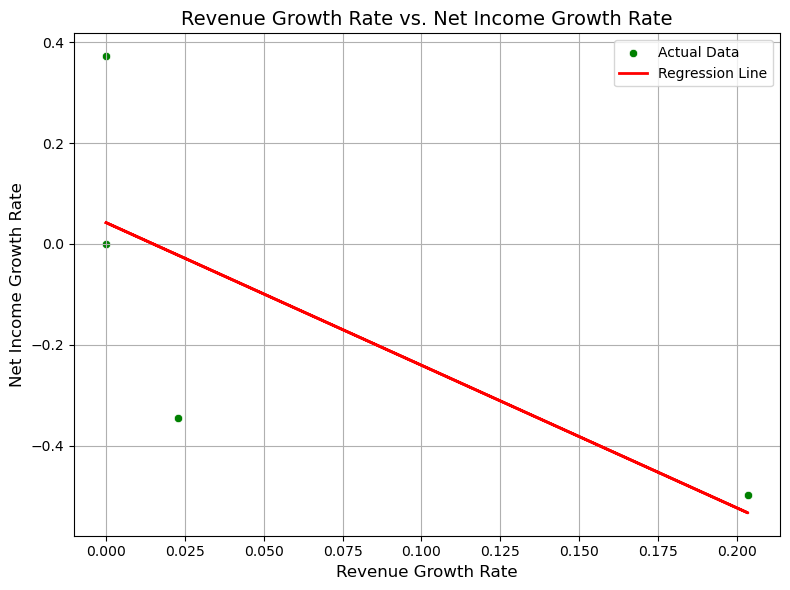

Regression results for Revenue Growth Rate and Net Income Growth Rate:
                            OLS Regression Results                            
Dep. Variable:      Net Income Growth   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2.146
Date:                Fri, 27 Dec 2024   Prob (F-statistic):              0.281
Time:                        16:24:16   Log-Likelihood:                0.15276
No. Observations:                   4   AIC:                             3.694
Df Residuals:                       2   BIC:                             2.467
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [158]:
# Define independent and dependent variables
X = df['Revenue Growth']  # Predictor: Revenue Growth Rate
y = df['Net Income Growth']  # Outcome: Net Income Growth Rate

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_nig = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_nig.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Revenue Growth'], y=y, label="Actual Data", color="green")
plt.plot(X['Revenue Growth'], y_pred, label="Regression Line", color="red", linewidth=2)
plt.title("Revenue Growth Rate vs. Net Income Growth Rate", fontsize=14)
plt.xlabel("Revenue Growth Rate", fontsize=12)
plt.ylabel("Net Income Growth Rate", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Regression results for Revenue Growth Rate and Net Income Growth Rate:")
print(model_nig.summary())

C:\Users\jiaju\AppData\Local\Temp\ipykernel_134564\3127747204.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='gray', label="Perfect Prediction Line")


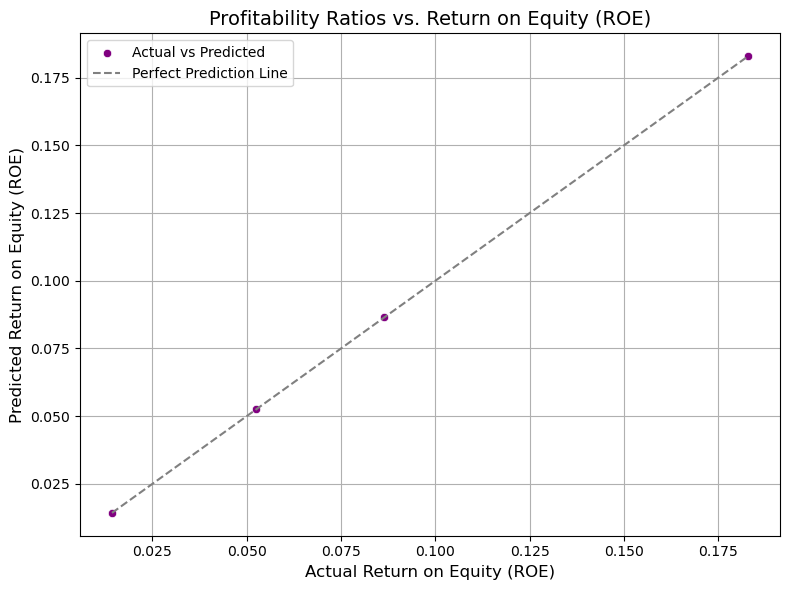

Multiple Regression results for Profitability Ratios and ROE:
                              OLS Regression Results                             
Dep. Variable:     Cash Return on Equity   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Fri, 27 Dec 2024   Prob (F-statistic):                nan
Time:                           16:24:59   Log-Likelihood:                 137.64
No. Observations:                      4   AIC:                            -267.3
Df Residuals:                          0   BIC:                            -269.7
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [162]:
# Define independent variables (multiple predictors)
X = df[['Gross Profit Margin', 'Operating Margin', 'Net Profit Margin']]  # Predictors
y = df['Cash Return on Equity']  # Outcome: Return on Equity

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_profitability = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_profitability.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, label="Actual vs Predicted", color="purple")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='gray', label="Perfect Prediction Line")
plt.title("Profitability Ratios vs. Return on Equity (ROE)", fontsize=14)
plt.xlabel("Actual Return on Equity (ROE)", fontsize=12)
plt.ylabel("Predicted Return on Equity (ROE)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Multiple Regression results for Profitability Ratios and ROE:")
print(model_profitability.summary())

C:\Users\jiaju\AppData\Local\Temp\ipykernel_134564\3564685355.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='gray', label="Perfect Prediction Line")


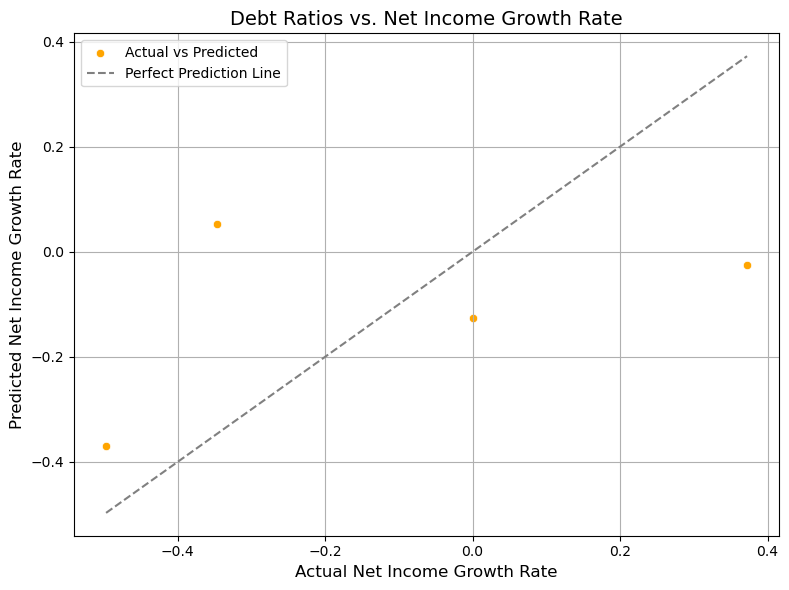

Multiple Regression results for Debt Ratios and Net Income Growth Rate:
                            OLS Regression Results                            
Dep. Variable:      Net Income Growth   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                 -1.325
Method:                 Least Squares   F-statistic:                    0.1451
Date:                Fri, 27 Dec 2024   Prob (F-statistic):              0.880
Time:                        16:25:34   Log-Likelihood:               -0.79598
No. Observations:                   4   AIC:                             7.592
Df Residuals:                       1   BIC:                             5.751
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [164]:
# Define independent variables (debt ratios)
X = df[['Debt-to-Equity Ratio', 'Debt-to-Assets Ratio']]  # Predictors
y = df['Net Income Growth']  # Outcome: Net Income Growth Rate

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_debt = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_debt.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, label="Actual vs Predicted", color="orange")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='gray', label="Perfect Prediction Line")
plt.title("Debt Ratios vs. Net Income Growth Rate", fontsize=14)
plt.xlabel("Actual Net Income Growth Rate", fontsize=12)
plt.ylabel("Predicted Net Income Growth Rate", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Multiple Regression results for Debt Ratios and Net Income Growth Rate:")
print(model_debt.summary())

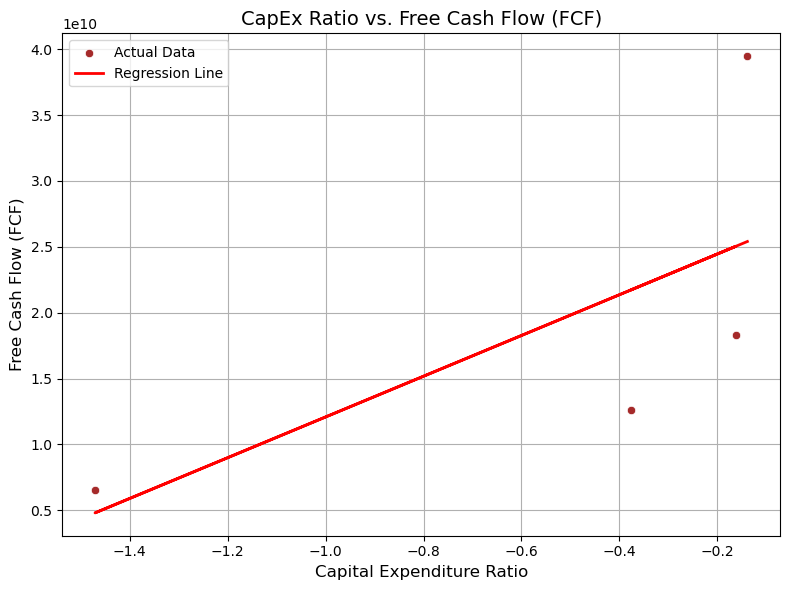

Regression results for CapEx Ratio and Free Cash Flow (FCF):
                            OLS Regression Results                            
Dep. Variable:                    FCF   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1.742
Date:                Fri, 27 Dec 2024   Prob (F-statistic):              0.318
Time:                        16:25:47   Log-Likelihood:                -97.386
No. Observations:                   4   AIC:                             198.8
Df Residuals:                       2   BIC:                             197.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [166]:
# Define independent and dependent variables
X = df['Capital Expenditure Ratio']  # Predictor: CapEx Ratio
y = df['FCF']  # Outcome: Free Cash Flow

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_capex_fcf = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_capex_fcf.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Capital Expenditure Ratio'], y=y, label="Actual Data", color="brown")
plt.plot(X['Capital Expenditure Ratio'], y_pred, label="Regression Line", color="red", linewidth=2)
plt.title("CapEx Ratio vs. Free Cash Flow (FCF)", fontsize=14)
plt.xlabel("Capital Expenditure Ratio", fontsize=12)
plt.ylabel("Free Cash Flow (FCF)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Regression results for CapEx Ratio and Free Cash Flow (FCF):")
print(model_capex_fcf.summary())

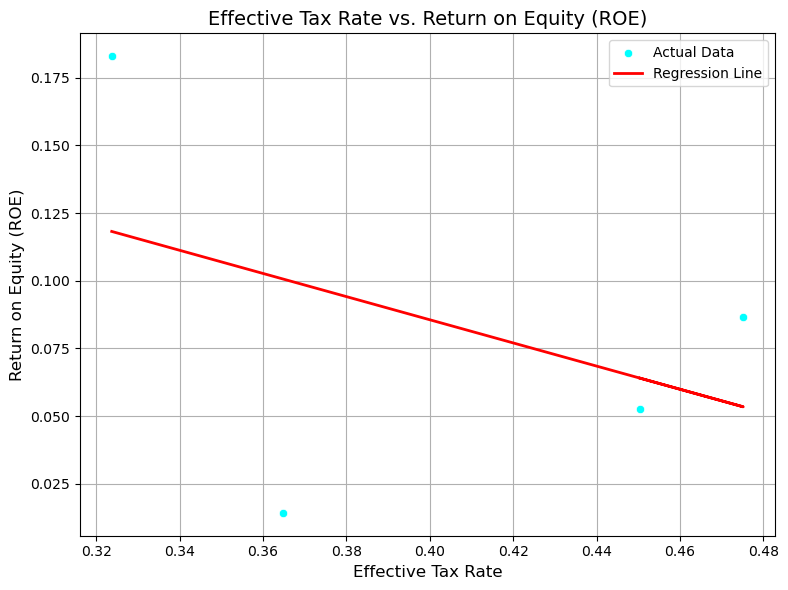

Regression results for Effective Tax Rate and ROE:
                              OLS Regression Results                             
Dep. Variable:     Cash Return on Equity   R-squared:                       0.178
Model:                               OLS   Adj. R-squared:                 -0.234
Method:                    Least Squares   F-statistic:                    0.4318
Date:                   Fri, 27 Dec 2024   Prob (F-statistic):              0.579
Time:                           16:26:08   Log-Likelihood:                 5.8048
No. Observations:                      4   AIC:                            -7.610
Df Residuals:                          2   BIC:                            -8.837
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [168]:
# Define independent and dependent variables
X = df['Effective Tax Rate']  # Predictor: Effective Tax Rate
y = df['Cash Return on Equity']  # Outcome: Return on Equity

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_tax_roe = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_tax_roe.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Effective Tax Rate'], y=y, label="Actual Data", color="cyan")
plt.plot(X['Effective Tax Rate'], y_pred, label="Regression Line", color="red", linewidth=2)
plt.title("Effective Tax Rate vs. Return on Equity (ROE)", fontsize=14)
plt.xlabel("Effective Tax Rate", fontsize=12)
plt.ylabel("Return on Equity (ROE)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Regression results for Effective Tax Rate and ROE:")
print(model_tax_roe.summary())

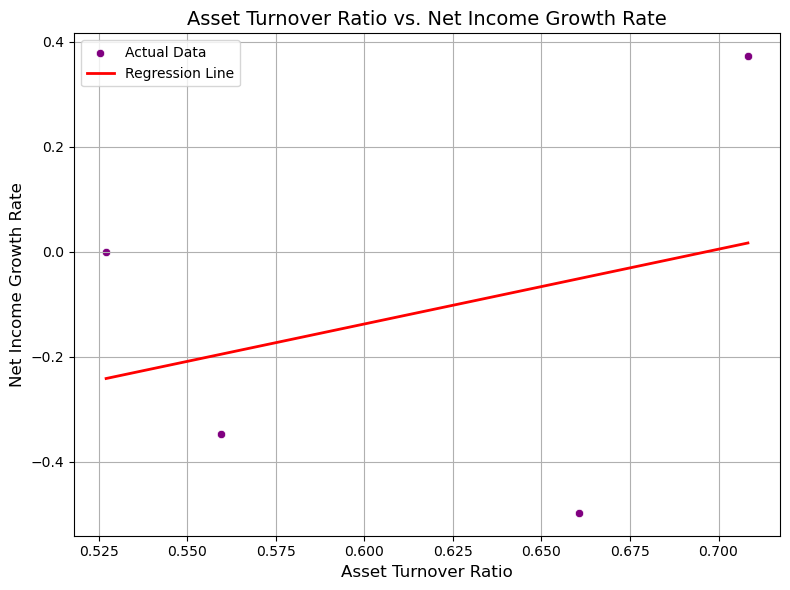

Regression results for Asset Turnover Ratio and Net Income Growth Rate:
                            OLS Regression Results                            
Dep. Variable:      Net Income Growth   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.354
Method:                 Least Squares   F-statistic:                    0.2153
Date:                Fri, 27 Dec 2024   Prob (F-statistic):              0.688
Time:                        16:26:33   Log-Likelihood:                -1.1010
No. Observations:                   4   AIC:                             6.202
Df Residuals:                       2   BIC:                             4.975
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

C:\Users\jiaju\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [170]:
# Define independent and dependent variables
X = df['Asset Turnover Ratio']  # Predictor: Asset Turnover Ratio
y = df['Net Income Growth']  # Outcome: Net Income Growth Rate

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_asset_turnover = sm.OLS(y, X).fit()

# Predicted values
y_pred = model_asset_turnover.predict(X)

# Plotting the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Asset Turnover Ratio'], y=y, label="Actual Data", color="purple")
plt.plot(X['Asset Turnover Ratio'], y_pred, label="Regression Line", color="red", linewidth=2)
plt.title("Asset Turnover Ratio vs. Net Income Growth Rate", fontsize=14)
plt.xlabel("Asset Turnover Ratio", fontsize=12)
plt.ylabel("Net Income Growth Rate", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression summary
print("Regression results for Asset Turnover Ratio and Net Income Growth Rate:")
print(model_asset_turnover.summary())